<a href="https://colab.research.google.com/github/Nidzam81/GRAB-SAFETY/blob/master/GRAB_SAFETY_CHALLENGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://assets.grab.com/wp-content/uploads/sites/12/2018/10/02163152/CoC-Online-Blog-Header.png)

# Author: MUHAMMAD NIDZAM BIN MASO'OD

**PROBLEM STATEMENT**

Given the telematics data for each trip and the label if the trip is tagged as dangerous driving, derive a model that can detect dangerous driving trips.

# IMPORTING FILE

---

In [0]:
!wget https://s3-ap-southeast-1.amazonaws.com/grab-aiforsea-dataset/safety.zip

--2019-06-12 00:01:00--  https://s3-ap-southeast-1.amazonaws.com/grab-aiforsea-dataset/safety.zip
Resolving s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)... 52.219.32.81
Connecting to s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)|52.219.32.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 851069371 (812M) [application/zip]
Saving to: ‘safety.zip’

safety.zip          100%[===================>] 811.64M  19.5MB/s    in 43s     

2019-06-12 00:01:44 (19.0 MB/s) - ‘safety.zip’ saved [851069371/851069371]



In [0]:
!unzip /content/safety.zip

Archive:  /content/safety.zip
   creating: safety/
  inflating: safety/.DS_Store        
   creating: __MACOSX/
   creating: __MACOSX/safety/
  inflating: __MACOSX/safety/._.DS_Store  
  inflating: safety/data_dictionary.xlsx  
  inflating: __MACOSX/safety/._data_dictionary.xlsx  
   creating: safety/features/
  inflating: safety/features/part-00001-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv  
   creating: __MACOSX/safety/features/
  inflating: __MACOSX/safety/features/._part-00001-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv  
  inflating: safety/features/.DS_Store  
  inflating: __MACOSX/safety/features/._.DS_Store  
  inflating: safety/features/part-00000-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv  
  inflating: __MACOSX/safety/features/._part-00000-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv  
  inflating: safety/features/part-00003-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv  
  inflating: __MACOSX/safety/features/._part-00003-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.c

# READ ALL THE CSV FILES FROM THE FEATURE FOLDER

In [0]:
#importing all the modules
import os
import glob
import pandas as pd
os.chdir("/content/safety/features/")

In [0]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [0]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])

In [0]:
combined_csv.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,1382979469316,3.900,253.000000,0.604904,3.442154,11.291794,0.033783,-0.022003,0.016525,606.0,17.140000
1,1374389534735,8.000,298.837677,0.102881,-8.985626,-4.233966,-0.019185,0.005250,0.006417,944.0,5.753025
2,601295421534,3.900,193.000000,-1.612495,9.058462,2.553416,-0.070530,0.259147,0.038558,517.0,10.599999
3,1365799600143,4.862,150.000000,1.307274,8.233912,0.466884,-0.130965,0.067347,0.022401,212.0,3.052726
4,25769803782,3.000,91.000000,0.730231,9.026140,0.726640,0.089907,-0.194145,-0.009420,572.0,1.653288


In [0]:
combined_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16135561 entries, 0 to 1613558
Data columns (total 11 columns):
bookingID         int64
Accuracy          float64
Bearing           float64
acceleration_x    float64
acceleration_y    float64
acceleration_z    float64
gyro_x            float64
gyro_y            float64
gyro_z            float64
second            float64
Speed             float64
dtypes: float64(10), int64(1)
memory usage: 1.4 GB


In [0]:
#combined_csv.to_csv('/content/gdrive/My Drive/GRAB/combined_data.csv')

In [0]:
label_data=pd.read_csv("/content/safety/labels/part-00000-e9445087-aa0a-433b-a7f6-7f4c19d78ad6-c000.csv")

In [0]:
label_data.head()

,bookingID,label
0,111669149733,0
1,335007449205,1
2,171798691856,0
3,1520418422900,0
4,798863917116,0


In [0]:
new_data=pd.merge(combined_csv,label_data, on=["bookingID"])
new_data.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
0,1382979469316,3.900,253.0,0.604904,3.442154,11.291794,0.033783,-0.022003,0.016525,606.0,17.14,0
1,1382979469316,4.712,258.0,-0.228287,3.852768,10.678879,0.104141,0.030533,0.006577,270.0,2.65,0
2,1382979469316,3.000,349.0,1.135223,4.196335,8.872452,-0.040756,-0.039780,-0.071198,285.0,1.10,0
3,1382979469316,3.000,0.0,0.250565,3.443359,9.025681,-0.007172,0.005798,-0.006607,488.0,0.00,0
4,1382979469316,3.143,257.0,0.394211,4.081421,8.708450,-0.034882,0.008469,-0.004471,502.0,3.28,0


# EXPLORATORY DATA ANALYSIS AND DATA TRANSFORMATION

To start with the analysis, we need to know what is the data

In [0]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16154418 entries, 0 to 16154417
Data columns (total 12 columns):
bookingID         int64
Accuracy          float64
Bearing           float64
acceleration_x    float64
acceleration_y    float64
acceleration_z    float64
gyro_x            float64
gyro_y            float64
gyro_z            float64
second            float64
Speed             float64
label             int64
dtypes: float64(10), int64(2)
memory usage: 1.6 GB


From the code above, we found that we have 16154418 data row entries with 12 columns. This is quite a lot of data. Lets check if unique data of the bookingID

In [0]:
data=new_data.bookingID.unique().tolist()
len(data)

20000

The data consist of 20000 unique values. Lets check one of the bookingID.

In [0]:
(new_data[new_data.bookingID ==1202590843006]).head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
13536155,1202590843006,4.700,338.0,0.668633,8.074158,4.975285,0.024766,-0.076585,0.027384,957.0,12.237660,1
13536156,1202590843006,10.621,93.0,0.823854,9.511464,1.938346,0.006423,0.124145,0.030473,611.0,4.595647,1
13536157,1202590843006,3.000,315.0,1.034075,8.771264,4.638191,0.008954,0.011310,0.012531,1025.0,0.000000,1
13536158,1202590843006,3.000,353.0,1.264110,9.084664,4.115978,0.006737,0.009582,0.016528,1345.0,0.000000,1
13536159,1202590843006,4.700,3.0,1.125878,9.969858,2.321772,0.054611,-0.017506,0.143658,943.0,13.183312,1


In [0]:
len(new_data[new_data.label ==0].bookingID.unique())

15017

In [0]:
len(new_data[new_data.label ==1].bookingID.unique())

5001

So in one bookingID, consist of multiple row of data. This data shows the telematics data from the vehicle. So what is telematics ?

"Telematics is a method of monitoring a vehicle. By combining a GPS system with on-board diagnostics it's possible to record – and map – exactly where a car is and how fast it's traveling, and cross reference that with how a car is behaving internally."

![alt text](http://www.kmgus.com/blogs/pcit/wp-content/uploads/2018/12/1200600-telematics-870x430.jpg)

[telematics](https://www.techradar.com/news/car-tech/telematics-what-you-need-to-know-1087104)


So what is considered dangerous driving?


Some of the examples is as below  

*   Excessive speeding (25 miles per hour or more over the posted speed limit)
*   Running red lights or stop signs
*   Intentionally failing to yield the right-of-way to other vehicles and pedestrians
*   Driving under the influence/while intoxicated
*   Racing other vehicles
*   Texting while driving
*   Sudden break
*   Sudden accelaration

So the approach i took to analyze the data is by describing the min, max and mean value from the accelaration and speed data within each bookingID trip to predict whether the trip dangerous or not.

**The first steps to analyze the data, is to get min,max,mean value from each bookingID, which mean we need to calculate for 20K unique values. In this code, I 'm saving the result to google drive so I can refer to it later without having to rerun the code again.**

In [0]:
#mounting gdrive to colab
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#creating the header name
import csv

row = ['bookingID', 
       'min_val_acc_x', 'max_val_acc_x','mean_val_acc_x',
       'min_val_acc_y','max_val_acc_y','mean_val_acc_y',
       'min_val_acc_z','max_val_acc_z','mean_val_acc_z',
       'min_speed','max_speed','mean_speed']

with open('/content/gdrive/My Drive/GRAB/grab_data.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(row)

csvFile.close()

In [0]:
#saving the result to a csv file.
import csv

for data_val in data:     # by item
    
    min_val_acc_x=new_data.loc[new_data['bookingID']==data_val,['acceleration_x']].min().item()
    max_val_acc_x=new_data.loc[new_data['bookingID']==data_val,['acceleration_x']].max().item()
    mean_val_acc_x=new_data.loc[new_data['bookingID']==data_val,['acceleration_x']].mean().item()
    min_val_acc_y=new_data.loc[new_data['bookingID']==data_val,['acceleration_y']].min().item()
    max_val_acc_y=new_data.loc[new_data['bookingID']==data_val,['acceleration_y']].max().item()
    mean_val_acc_y=new_data.loc[new_data['bookingID']==data_val,['acceleration_y']].mean().item()
    min_val_acc_z=new_data.loc[new_data['bookingID']==data_val,['acceleration_z']].min().item()
    max_val_acc_z=new_data.loc[new_data['bookingID']==data_val,['acceleration_z']].max().item()
    mean_val_acc_z=new_data.loc[new_data['bookingID']==data_val,['acceleration_z']].mean().item()
    min_speed=new_data.loc[new_data['bookingID']==data_val,['Speed']].min().item()
    max_speed=new_data.loc[new_data['bookingID']==data_val,['Speed']].max().item()
    mean_speed=new_data.loc[new_data['bookingID']==data_val,['Speed']].mean().item()
   

    row = [data_val, 
           min_val_acc_x, max_val_acc_x,mean_val_acc_x,
           min_val_acc_y,max_val_acc_y,mean_val_acc_y,
           min_val_acc_z,max_val_acc_z,mean_val_acc_z,
           min_speed,max_speed,mean_speed]

    with open('/content/gdrive/My Drive/GRAB/grab_data.csv', 'a') as csvFile:
        writer = csv.writer(csvFile)
        writer.writerow(row)

    csvFile.close()
    
#    results_max.append(max_val)

**Now, once the calculation completed, we're ready to do the analysis. First we need to read the csv file and map it to the label**

In [0]:
df=pd.read_csv('/content/gdrive/My Drive/GRAB/grab_data.csv')
df.dtypes
df=pd.merge(df,label_data, on=["bookingID"])
df.head()


,bookingID,min_val_acc_x,max_val_acc_x,mean_val_acc_x,min_val_acc_y,max_val_acc_y,mean_val_acc_y,min_val_acc_z,max_val_acc_z,mean_val_acc_z,min_speed,max_speed,mean_speed,label
0,1382979469316,-1.746216,3.957977,0.735532,0.611023,6.656372,3.477891,6.778717,11.291794,9.247259,0.000000,19.740000,6.242966,0
1,1374389534735,-2.562601,2.991022,0.154202,-11.619705,-7.418637,-9.246583,-5.076901,-0.970190,-3.055524,0.054896,23.503937,12.734506,0
2,601295421534,-2.214637,4.575319,1.205679,5.638345,12.951434,9.649992,-3.454833,8.554482,2.530088,-1.000000,27.570000,12.785535,0
3,1365799600143,-2.621731,3.895485,0.850133,5.806117,15.287445,9.593983,-2.020768,4.632922,0.552848,-1.000000,21.803320,6.289206,1
4,25769803782,-3.525462,3.849876,0.023691,7.528567,12.714408,9.697537,-2.975993,4.552575,0.504998,-1.000000,18.282934,5.814538,0


In [0]:
df.tail()

,bookingID,min_val_acc_x,max_val_acc_x,mean_val_acc_x,min_val_acc_y,max_val_acc_y,mean_val_acc_y,min_val_acc_z,max_val_acc_z,mean_val_acc_z,min_speed,max_speed,mean_speed,label
20013,326417514529,-4.028732,2.634094,-0.240266,7.443008,10.998749,9.049537,-1.912933,8.127350,4.343166,0.000000,11.530155,4.008022,1
20014,1700807049234,-3.130051,2.359085,0.223092,7.316589,10.993759,9.564479,-3.053848,3.098099,0.266430,0.000000,16.000000,9.698000,0
20015,223338299572,-1.677347,2.624210,0.263132,-12.334189,-7.151416,-9.620924,-3.081192,1.846024,-0.673253,2.970000,17.190001,11.775556,0
20016,171798692002,-3.502824,2.054288,-0.307455,6.002447,11.921094,9.196270,-0.581809,6.071881,3.340089,-1.000000,15.403564,5.079612,0
20017,1159641169927,-5.926846,5.037400,0.090212,1.442507,13.702016,8.749598,-4.599261,9.437943,3.815523,7.708327,19.699690,15.764295,0


In [0]:
def FindDuplicates(in_list):
    unique = set(in_list)
    if len(unique) == len(in_list):
        print('There are no duplicates in this list')
        return False
    else:
        print('There are duplicates in this list')
        return True

FindDuplicates(df)

There are duplicates in this list


True

**I found there are duplicate rows inside the data. To tackle this, I saved the file to google drive and remove the duplicate using excel remove duplicate function. (tried using drop.duplicates but it can't seem to remove the duplicate)**

In [0]:
#save to file
df.to_csv('/content/gdrive/My Drive/GRAB/grab_data_check.csv')

In [0]:
#
df=pd.read_csv('/content/gdrive/My Drive/GRAB/grab_data_check_dro_dup.csv')
df.head()

,bookingID,min_val_acc_x,max_val_acc_x,mean_val_acc_x,min_val_acc_y,max_val_acc_y,mean_val_acc_y,min_val_acc_z,max_val_acc_z,mean_val_acc_z,min_speed,max_speed,mean_speed,label
0,1382979469316,-1.746216,3.957977,0.735532,0.611023,6.656372,3.477891,6.778717,11.291794,9.247259,0.000000,19.740000,6.242966,0
1,1374389534735,-2.562601,2.991022,0.154202,-11.619705,-7.418637,-9.246583,-5.076901,-0.970190,-3.055524,0.054896,23.503937,12.734506,0
2,601295421534,-2.214637,4.575319,1.205679,5.638345,12.951434,9.649992,-3.454833,8.554482,2.530088,-1.000000,27.570000,12.785535,0
3,1365799600143,-2.621731,3.895485,0.850133,5.806117,15.287445,9.593983,-2.020768,4.632922,0.552848,-1.000000,21.803320,6.289206,1
4,25769803782,-3.525462,3.849876,0.023691,7.528567,12.714408,9.697537,-2.975993,4.552575,0.504998,-1.000000,18.282934,5.814538,0


From the data, I found the min speed data is not so useful, so i decided to drop this column.

In [0]:
df.tail()

,bookingID,min_val_acc_x,max_val_acc_x,mean_val_acc_x,min_val_acc_y,max_val_acc_y,mean_val_acc_y,min_val_acc_z,max_val_acc_z,mean_val_acc_z,min_speed,max_speed,mean_speed,label
20013,326417514529,-4.028732,2.634094,-0.240266,7.443008,10.998749,9.049537,-1.912933,8.127350,4.343166,0.000000,11.530155,4.008022,1
20014,1700807049234,-3.130051,2.359085,0.223092,7.316589,10.993759,9.564479,-3.053848,3.098099,0.266430,0.000000,16.000000,9.698000,0
20015,223338299572,-1.677347,2.624210,0.263132,-12.334189,-7.151416,-9.620924,-3.081192,1.846024,-0.673253,2.970000,17.190001,11.775556,0
20016,171798692002,-3.502824,2.054288,-0.307455,6.002447,11.921094,9.196270,-0.581809,6.071881,3.340089,-1.000000,15.403564,5.079612,0
20017,1159641169927,-5.926846,5.037400,0.090212,1.442507,13.702016,8.749598,-4.599261,9.437943,3.815523,7.708327,19.699690,15.764295,0


In [0]:
df[df.label==0].bookingID

In [0]:
len(df[df.label==0])

15007

In [0]:
df=df.drop(columns=['min_speed'])

**Lets plot some distribution plot using violin plot**

In [0]:
import seaborn as sns
z=list(df.drop(columns=['bookingID','label']).columns.values)

print(z)

['min_val_acc_x', 'max_val_acc_x', 'mean_val_acc_x', 'min_val_acc_y', 'max_val_acc_y', 'mean_val_acc_y', 'min_val_acc_z', 'max_val_acc_z', 'mean_val_acc_z', 'min_speed', 'max_speed', 'mean_speed']


Text(0.5, 1.0, 'min_val_acc_x label 0 and label 1 plot')

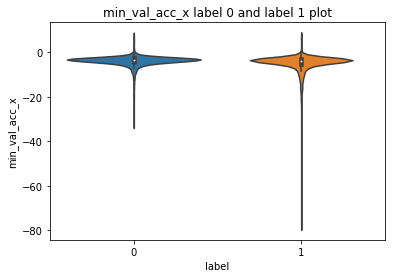

In [0]:


sns.violinplot(  y=z[0], x= "label",col=z[0], data=df).set_title(z[0] + ' label 0 and label 1 plot')


Text(0.5, 1.0, 'max_val_acc_x label 0 and label 1 plot')

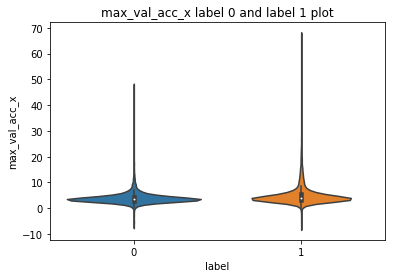

In [0]:
sns.violinplot(  y=z[1], x= "label",col=z[1], data=df).set_title(z[1] + ' label 0 and label 1 plot')

Text(0.5, 1.0, 'mean_val_acc_x label 0 and label 1 plot')

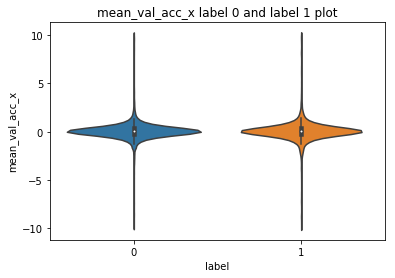

In [0]:
sns.violinplot(  y=z[2], x= "label",col=z[2], data=df).set_title(z[2] + ' label 0 and label 1 plot')

Text(0.5, 1.0, 'min_val_acc_y label 0 and label 1 plot')

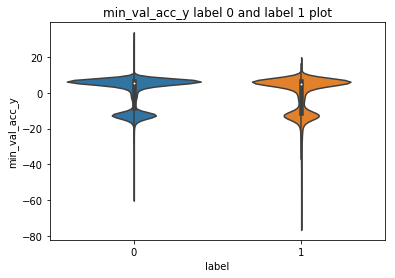

In [0]:
sns.violinplot(  y=z[3], x= "label",col=z[3], data=df).set_title(z[3] + ' label 0 and label 1 plot')

Text(0.5, 1.0, 'max_val_acc_y label 0 and label 1 plot')

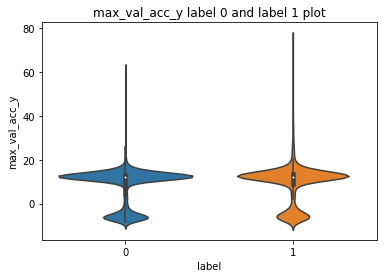

In [0]:
sns.violinplot(  y=z[4], x= "label",col=z[4], data=df).set_title(z[4] + ' label 0 and label 1 plot')

Text(0.5, 1.0, 'mean_val_acc_y label 0 and label 1 plot')

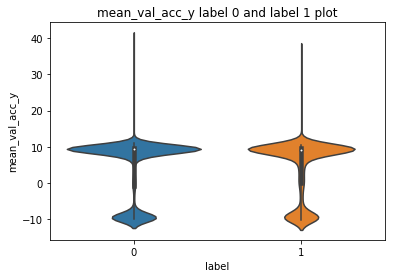

In [0]:
sns.violinplot(  y=z[5], x= "label",col=z[5], data=df).set_title(z[5] + ' label 0 and label 1 plot')

Text(0.5, 1.0, 'min_val_acc_z label 0 and label 1 plot')

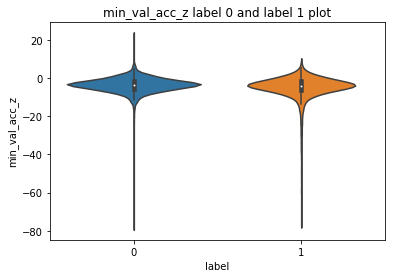

In [0]:
sns.violinplot(  y=z[6], x= "label",col=z[6], data=df).set_title(z[6] + ' label 0 and label 1 plot')

Text(0.5, 1.0, 'max_val_acc_z label 0 and label 1 plot')

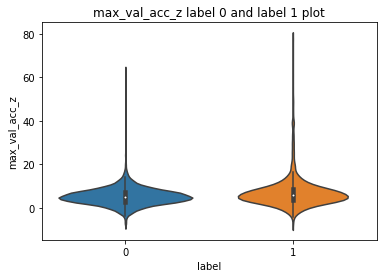

In [0]:
sns.violinplot(  y=z[7], x= "label",col=z[7], data=df).set_title(z[7] + ' label 0 and label 1 plot')

Text(0.5, 1.0, 'mean_val_acc_z label 0 and label 1 plot')

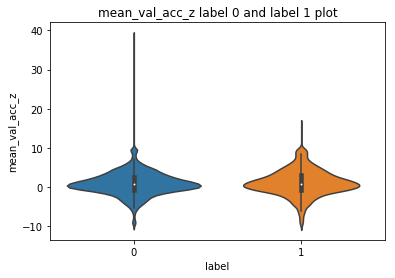

In [0]:
sns.violinplot(  y=z[8], x= "label",col=z[8], data=df).set_title(z[8] + ' label 0 and label 1 plot')

Text(0.5, 1.0, 'min_speed label 0 and label 1 plot')

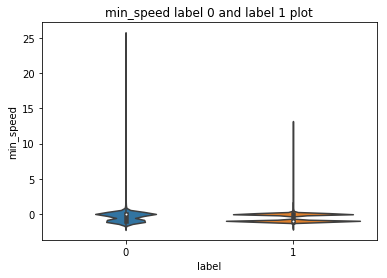

In [0]:
sns.violinplot(  y=z[9], x= "label",col=z[9], data=df).set_title(z[9] + ' label 0 and label 1 plot')

Text(0.5, 1.0, 'max_speed label 0 and label 1 plot')

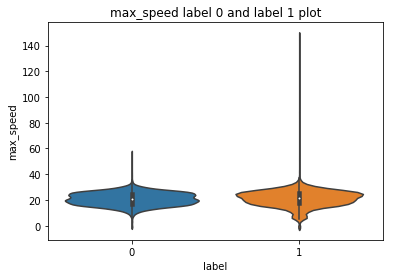

In [0]:
sns.violinplot(  y=z[10], x= "label",col=z[10], data=df).set_title(z[10] + ' label 0 and label 1 plot')

**From the violin plot, we can observed that label 1 is having a longer whisker in min and max value of each acceleration axis.**

Lets plot some scatter plot to see if there are any different between label 0 and label 1 value.

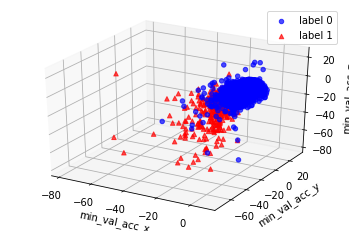

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x=df[df.label==0][['min_val_acc_x']]
y=df[df.label==0][['min_val_acc_y']]
z=df[df.label==0][['min_val_acc_z']]

x2=df[df.label==1][['min_val_acc_x']]
y2=df[df.label==1][['min_val_acc_y']]
z2=df[df.label==1][['min_val_acc_z']]

ax.scatter(x, y, z, c='b', alpha=0.7,marker='o',label='label 0')
ax.scatter(x2, y2, z2, c='r', alpha=0.7,marker='^',label='label 1')
ax.legend()

ax.set_xlabel('min_val_acc_x')
ax.set_ylabel('min_val_acc_y')
ax.set_zlabel('min_val_acc_z')

plt.show()

**We can observe differences in label 0 and 1 in which label 1 tends to have lower min accelaration value. From the observation, I presume that sudden breaking can be a factor in dangerous driving behaviour.**

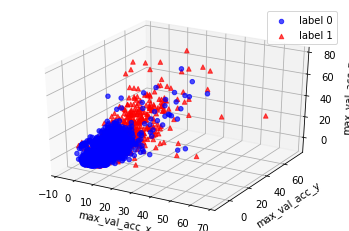

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x=df[df.label==0][['max_val_acc_x']]
y=df[df.label==0][['max_val_acc_y']]
z=df[df.label==0][['max_val_acc_z']]

x2=df[df.label==1][['max_val_acc_x']]
y2=df[df.label==1][['max_val_acc_y']]
z2=df[df.label==1][['max_val_acc_z']]

ax.scatter(x, y, z, c='b', alpha=0.7,marker='o',label='label 0')
ax.scatter(x2, y2, z2, c='r', alpha=0.7,marker='^',label='label 1')
ax.legend()

ax.set_xlabel('max_val_acc_x')
ax.set_ylabel('max_val_acc_y')
ax.set_zlabel('max_val_acc_z')

plt.show()

**We can observe differences in label 0 and 1 in which label 1 tends to have higher max accelaration value. From the observation, I presume that sudden accelaration in speed can be a factor in dangerous driving behaviour.**

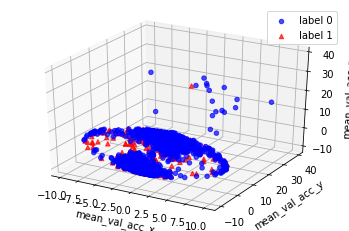

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x=df[df.label==0][['mean_val_acc_x']]
y=df[df.label==0][['mean_val_acc_y']]
z=df[df.label==0][['mean_val_acc_z']]

x2=df[df.label==1][['mean_val_acc_x']]
y2=df[df.label==1][['mean_val_acc_y']]
z2=df[df.label==1][['mean_val_acc_z']]

ax.scatter(x, y, z, c='b', alpha=0.7,marker='o',label='label 0')
ax.scatter(x2, y2, z2, c='r', alpha=0.7,marker='^',label='label 1')
ax.legend()

ax.set_xlabel('mean_val_acc_x')
ax.set_ylabel('mean_val_acc_y')
ax.set_zlabel('mean_val_acc_z')

plt.show()

**No obvious differences can be observed from mean val**

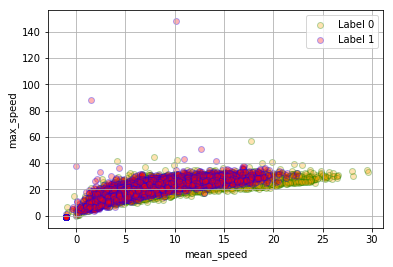

In [0]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
x=df[df.label==0][['mean_speed']]
y=df[df.label==0][['max_speed']]
x2=df[df.label==1][['mean_speed']]
y2=df[df.label==1][['max_speed']] 

ax.scatter(x, y, c='orange', label='Label 0',
               alpha=0.3, edgecolors='green')
ax.scatter(x2, y2, c='red', label='Label 1',
               alpha=0.3, edgecolors='blue')
ax.legend()
ax.set_xlabel("mean_speed")
ax.set_ylabel("max_speed")
ax.grid(True)

plt.show()

**No obvious difference in term of speed**

In [0]:
#seperating data and labels
Label = df['label']
Features = df.drop(['label','bookingID'],axis=1)


In [0]:
Label.head(2)


0    0
1    0
Name: label, dtype: int64

In [0]:
Features.head(2)

,min_val_acc_x,max_val_acc_x,mean_val_acc_x,min_val_acc_y,max_val_acc_y,mean_val_acc_y,min_val_acc_z,max_val_acc_z,mean_val_acc_z,max_speed,mean_speed
0,-1.746216,3.957977,0.735532,0.611023,6.656372,3.477891,6.778717,11.291794,9.247259,19.740000,6.242966
1,-2.562601,2.991022,0.154202,-11.619705,-7.418637,-9.246583,-5.076901,-0.970190,-3.055524,23.503937,12.734506


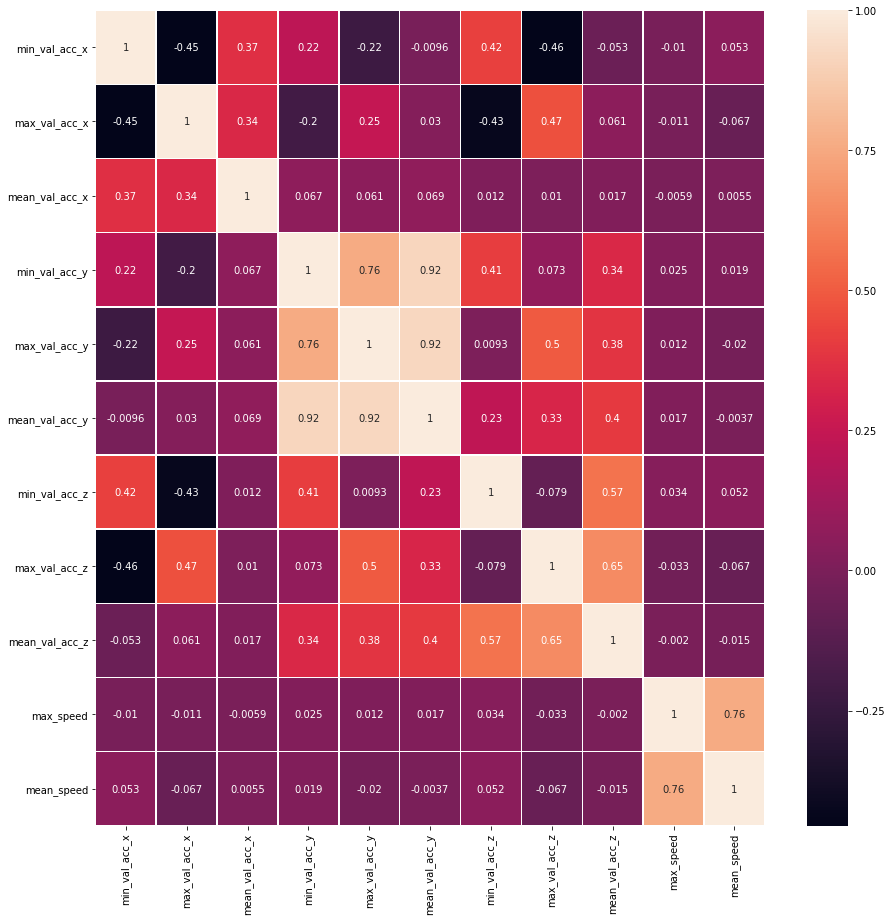

In [0]:
#Checking correlation and plot it
import seaborn as sns
Features.corr()
plt.figure(figsize=(15,15))
sns.heatmap(Features.corr(), annot=True, linewidths=.5,)

# Machine Learning model training

In [0]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import sklearn as sk
import scipy.stats as stats
import time
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,precision_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.externals import joblib


## COMMON METHOD

In [0]:
len(X_test)

6000

In [0]:
print(np.shape(X_test))

(6000, 11)


In [0]:
from sklearn.externals import joblib

# Splitting data to Train and Test 




models = []
models.append(('LogisticRegression',LogisticRegression(solver='liblinear')))
models.append(('GaussianNB',GaussianNB()))
models.append(('KNeighborsClassifier',KNeighborsClassifier()))
models.append(('SVC',SVC(gamma='auto')))
models.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
models.append(('RandomForestClassifier',RandomForestClassifier(n_estimators=100)))

names = []
acc = []


for name,model in models: 
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    %timeit model.fit(X_train,y_train)
    print (name)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test, y_pred))
    filename = "/content/gdrive/My Drive/GRAB/weight/"+name+".pkl"
    #joblib.dump(model, open(filename, 'wb'))
    joblib.dump(model, filename)
    
    

10 loops, best of 3: 105 ms per loop
LogisticRegression
[[4457   57]
 [1361  125]]
              precision    recall  f1-score   support

           0       0.77      0.99      0.86      4514
           1       0.69      0.08      0.15      1486

    accuracy                           0.76      6000
   macro avg       0.73      0.54      0.51      6000
weighted avg       0.75      0.76      0.69      6000

100 loops, best of 3: 3.68 ms per loop
GaussianNB
[[4175  339]
 [1242  244]]
              precision    recall  f1-score   support

           0       0.77      0.92      0.84      4514
           1       0.42      0.16      0.24      1486

    accuracy                           0.74      6000
   macro avg       0.59      0.54      0.54      6000
weighted avg       0.68      0.74      0.69      6000

100 loops, best of 3: 9.05 ms per loop
KNeighborsClassifier
[[4096  418]
 [1212  274]]
              precision    recall  f1-score   support

           0       0.77      0.91      0.83 

## XGBOOST

In [0]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

#y_pred = xg_class.predict(X_test)
#print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test, y_pred))

param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 2}  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations

bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)


# extracting most confident predictions
best_preds = np.asarray([np.argmax(line) for line in preds])
print(precision_score(y_test, best_preds, average='macro'))
print(confusion_matrix(y_test,best_preds))
print(classification_report(y_test, best_preds))
joblib.dump(bst, 'bst_model.pkl', compress=True)


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.7695958072952841
[[4471   43]
 [1342  144]]
              precision    recall  f1-score   support

           0       0.77      0.99      0.87      4514
           1       0.77      0.10      0.17      1486

    accuracy                           0.77      6000
   macro avg       0.77      0.54      0.52      6000
weighted avg       0.77      0.77      0.69      6000



['bst_model.pkl']

## NEURAL NETWORK (KERAS)

In [0]:
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.regularizers import l2
import numpy as np

Using TensorFlow backend.


In [0]:
#X_train,X_test,y_train,y_test = train_test_split(Features,Label,test_size=0.3,random_state = 125)

In [0]:
model=Sequential()

model.add(Dense(100,activation='relu', input_dim=11,kernel_regularizer=l2(0.01)))
model.add(Dropout(rate=0.3,noise_shape=None,seed=None,))

model.add(Dense(100,activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dropout(rate=0.3,noise_shape=None,seed=None))

model.add(Dense(1,activation='sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               1200      
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 11,401
Trainable params: 11,401
Non-trainable params: 0
_________________________________________________________________


In [0]:
output=model.fit(X_train,y_train,epochs=500,batch_size=20,verbose=1,validation_data=(X_test,y_test),)

Train on 14000 samples, validate on 6000 samples
Epoch 1/500
14000/14000 [==============================] - 3s 226us/step - loss: 1.0641 - acc: 0.7375 - val_loss: 0.7633 - val_acc: 0.7595
Epoch 2/500
14000/14000 [==============================] - 3s 189us/step - loss: 0.6832 - acc: 0.7630 - val_loss: 0.6159 - val_acc: 0.7605
Epoch 3/500
14000/14000 [==============================] - 3s 188us/step - loss: 0.5941 - acc: 0.7634 - val_loss: 0.5709 - val_acc: 0.7602
Epoch 4/500
14000/14000 [==============================] - 3s 189us/step - loss: 0.5646 - acc: 0.7649 - val_loss: 0.5572 - val_acc: 0.7600
Epoch 5/500
14000/14000 [==============================] - 3s 187us/step - loss: 0.5514 - acc: 0.7641 - val_loss: 0.5705 - val_acc: 0.7593
Epoch 6/500
14000/14000 [==============================] - 3s 189us/step - loss: 0.5472 - acc: 0.7644 - val_loss: 0.5458 - val_acc: 0.7603
Epoch 7/500
14000/14000 [==============================] - 3s 187us/step - loss: 0.5451 - acc: 0.7639 - val_loss: 0.5

In [0]:
print('Training Accuracy :' ,np.mean(output.history["acc"]))
print('Validation Accuracy :' ,np.mean(output.history["val_acc"]))

Training Accuracy : 0.7597351437506932
Validation Accuracy : 0.7684780004286765


In [0]:
y_pred=model.predict(X_test)
rounded=[round(x[0]) for x in y_pred]
y_pred1=np.array(rounded,dtype='int64')

In [0]:
confusion_matrix(y_test,y_pred1)

array([[4507,    7],
       [1378,  108]])

In [0]:
 print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4514
           1       0.94      0.07      0.13      1486

    accuracy                           0.77      6000
   macro avg       0.85      0.54      0.50      6000
weighted avg       0.81      0.77      0.69      6000



In [0]:
model.save( "/content/gdrive/My Drive/GRAB/weight/NN.h5")

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance

def base_model():
    model = Sequential()        
    ...
    return model

X = ...
y = ...

my_model = KerasRegressor(build_fn=base_model, **sk_params)    
my_model.fit(X,y)

perm = PermutationImportance(my_model, random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

# MODEL TRAINING RESULT

From the training done, and considering algorithm accuracy,  precision , recall and f1-score value, in my opinion, the neural network produces the best training result for the data





#MODEL DEPLOYMENT

**Loading the model**

In [5]:
#Loading the model
from keras.models import load_model
model = load_model("/content/gdrive/My Drive/GRAB/weight/NN.h5")

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


**Creating function to transform data from raw data into structured that could be understand by the model**

In [0]:
# Create function to create data to feed into model
def run_eval( data_val ):
  
    min_val_acc_x=test_data.loc[test_data['bookingID']==data_val,['acceleration_x']].min().item()
    max_val_acc_x=test_data.loc[test_data['bookingID']==data_val,['acceleration_x']].max().item()
    mean_val_acc_x=test_data.loc[test_data['bookingID']==data_val,['acceleration_x']].mean().item()
    min_val_acc_y=test_data.loc[test_data['bookingID']==data_val,['acceleration_y']].min().item()
    max_val_acc_y=test_data.loc[test_data['bookingID']==data_val,['acceleration_y']].max().item()
    mean_val_acc_y=test_data.loc[test_data['bookingID']==data_val,['acceleration_y']].mean().item()
    min_val_acc_z=test_data.loc[test_data['bookingID']==data_val,['acceleration_z']].min().item()
    max_val_acc_z=test_data.loc[test_data['bookingID']==data_val,['acceleration_z']].max().item()
    mean_val_acc_z=test_data.loc[test_data['bookingID']==data_val,['acceleration_z']].mean().item()
    #min_speed=test_data.loc[test_data['bookingID']==data_val,['Speed']].min().item()
    max_speed=test_data.loc[test_data['bookingID']==data_val,['Speed']].max().item()
    mean_speed=test_data.loc[test_data['bookingID']==data_val,['Speed']].mean().item()
    
    row = [min_val_acc_x, max_val_acc_x,mean_val_acc_x,
           min_val_acc_y,max_val_acc_y,mean_val_acc_y,
           min_val_acc_z,max_val_acc_z,mean_val_acc_z,
           max_speed,mean_speed]
    
    X_new = np.array(row)
    X_new=X_new.reshape(1,-1)
    predict_result2=model.predict_classes(X_new)
    #print(predict_result2.item())
    return predict_result2.item()

**For deployment, we can grab the raw data from database or csv as long as it is in the same format. In this example, I will just use the file from features folder to demonstrate how this model can be execute.**

In [0]:
import pandas as pd
import numpy as np
test_data=pd.read_csv('/content/safety/features/part-00009-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')
#test_data=new_data

In [3]:
test_data.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,1554778161164,7.585,206.000000,0.854950,9.652863,-0.682571,0.009521,-0.030655,0.027252,432.0,17.690000
1,592705486931,10.000,61.336914,0.003738,-11.494394,-2.562900,-0.004217,0.012375,0.029961,531.0,13.070000
2,1288490188801,6.000,298.000000,-0.931373,9.862018,5.674431,-0.062343,-0.539092,0.105505,596.0,14.052768
3,369367187514,4.376,0.000000,-1.383849,8.075643,4.765658,0.010731,-0.077926,-0.054265,376.0,0.000000
4,1194000908321,3.900,299.000000,0.811659,9.447808,1.807678,-0.079931,-0.118189,-0.056884,757.0,12.618248


**Evaluating particular booking ID**

In [15]:
data_val=1554778161164
run_eval(data_val=data_val)
result=run_eval(data_val=data_val)
if result == 0:
  print(str(data_val) + " Safe driving")
else:
  print(str(data_val) + "Dangerous driving")

1554778161164 Safe driving


**Evaluating every unique bookingID whithin a file\database**

In [27]:
outcome =[]
data=test_data.bookingID.unique().tolist()
for data_val in data:
  print(data_val)
  run_eval(data_val=data_val)
  result=run_eval(data_val=data_val)
  if result == 0:
    print(str(data_val) + " Safe driving")
    status="Safe driving"
  else:
    print(str(data_val) + " Dangerous driving")
    status="Dangerous driving"
  result_data.append([data_val,result,status])



1554778161164
1554778161164 Safe driving
592705486931
592705486931 Safe driving
1288490188801
1288490188801 Safe driving
369367187514
369367187514 Safe driving
1194000908321
1194000908321 Safe driving
438086664305
438086664305 Safe driving
575525617781
575525617781 Safe driving
343597383767
343597383767 Safe driving
429496729698
429496729698 Safe driving
231928234036
231928234036 Safe driving
850403524688
850403524688 Safe driving
1700807049347
1700807049347 Safe driving
1219770712157
1219770712157 Safe driving
360777252877
360777252877 Safe driving
317827580081
317827580081 Safe driving
807453851813
807453851813 Safe driving
1357209665663
1357209665663 Safe driving
180388626548
180388626548 Safe driving
1529008357521
1529008357521 Safe driving
1460288880687
1460288880687 Safe driving
884763263067
884763263067 Safe driving
1563368095915
1563368095915 Safe driving
300647710786
300647710786 Safe driving
833223655494
833223655494 Safe driving
206158430330
206158430330 Safe driving
1460288

# CONCLUSION

**From the dataset, the dangerous driving behaviour are classified for the whole booking ID and not at any invidual ride point. We can't exactly know at what point a ride is  classified as dangerous. In order to tackle this, I calculated the statistical details of each ride and using machine learning try to predict whether a ride is classified as dangerous or not. From the training result, I found out that Neural Network (KERAS) model produce the best model prediction result. Using my method, we don't have to continuously run the model in order to monitor the driving behaviour. Instead we can run the model at an interval time such as every 5 minutes. In this way, it will be lesser the cost of monitoring the driving behaviour.**